In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
# import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.linear_model import RANSACRegressor
import scipy.stats
from matplotlib import style
from datetime import timedelta

Net_df = pd.read_csv('Data/Net_df_1223_total_region.csv')

Net_df['inf_time'] = pd.to_datetime(Net_df['inf_time'], format="%Y-%m-%d", errors='ignore')
Net_df['inf_time'] = Net_df['inf_time'].dt.date
Net_df['Primary_id'] = Net_df['Primary_id'].astype(int)

In [2]:
style.use('ggplot')
plt.rcParams["font.family"] = "Palatino Linotype"
vc_df = pd.read_csv('Data/주차별 백신접종자 통계 DB_211024기준.csv')

vc_df['num_dose'] = vc_df.iloc[:,4:-1].sum(axis=1)
vc_age_dict = dict(Counter(vc_df['연령']))
vc_age_list = list(vc_age_dict.keys())

vc_date_dict = dict(Counter(vc_df['date']))
vc_date_list = list(vc_date_dict.keys())

vc_date_list_2 = []
for i2 in range(len(vc_date_list)):
    vc_date_list_2.append(vc_date_list[i2][0:10])

<ipython-input-4-dfbf4ff178e3>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(yticks_.astype(int), fontsize=20)
<ipython-input-4-dfbf4ff178e3>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(yticks_.astype(int), fontsize=20)
<ipython-input-4-dfbf4ff178e3>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(yticks_.astype(int), fontsize=20)


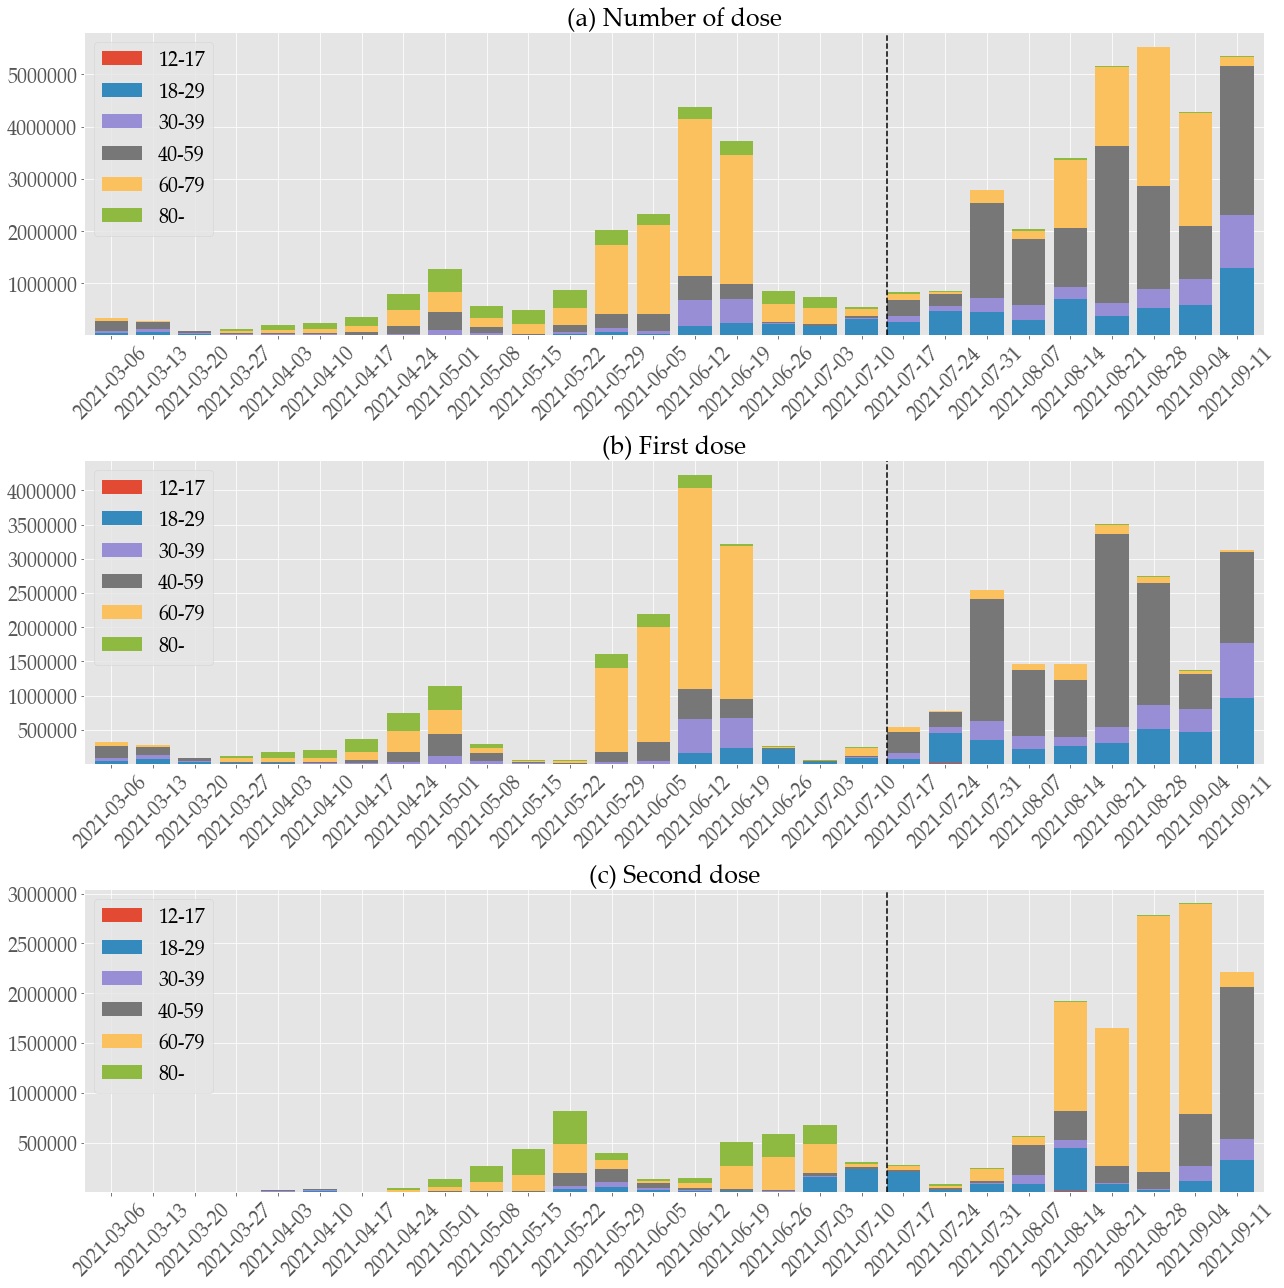

In [4]:
fig, ax = plt.subplots(3,1, figsize=(18,18))

vc_age_num = [[],[],[],[],[],[],[],[],[],[]]
for i2 in vc_date_list[0:28]:
    ct = 0
    for i3 in vc_age_list:
        vc_age_num[ct].append(vc_df['num_dose'][(vc_df['date'] == i2) & (vc_df['연령'] == i3)].sum())
        ct +=1
        
vc_df2 = pd.DataFrame({'date' : vc_date_list[0:28],
                      '12-17' : vc_age_num[0],
                      '18-29' : vc_age_num[1],
                      '30-39' : vc_age_num[2],
                      '40-59' : np.array(vc_age_num[3]) + np.array(vc_age_num[4]),
                      '60-79' : np.array(vc_age_num[5]) + np.array(vc_age_num[6]) + np.array(vc_age_num[7]) + np.array(vc_age_num[8]),
                      '80-' : vc_age_num[9]})

ax[0] = vc_df2.plot.bar(ax=ax[0],width=0.8,stacked=True)
ax[0].set_xticklabels(vc_date_list_2[0:28], rotation=45, fontsize=20)
yticks_ = ax[0].get_yticks(minor=False)
ax[0].set_yticklabels(yticks_.astype(int), fontsize=20)
ax[0].set_title('(a) Number of dose', fontsize=25)
ax[0].axvline(x=18.6, color='k', linestyle='--')
ax[0].legend(fontsize=20)
# plt.savefig('Number_of_dose')

vc_age_num = [[],[],[],[],[],[],[],[],[],[]]
for i2 in vc_date_list[0:28]:
    ct = 0
    for i3 in vc_age_list:
        vc_age_num[ct].append(vc_df['num_dose'][(vc_df['date'] == i2) & (vc_df['연령'] == i3) & (vc_df['차수'] == 1)].sum())
        ct +=1
        
vc_df2 = pd.DataFrame({'date' : vc_date_list[0:28],
                      '12-17' : vc_age_num[0],
                      '18-29' : vc_age_num[1],
                      '30-39' : vc_age_num[2],
                      '40-59' : np.array(vc_age_num[3]) + np.array(vc_age_num[4]),
                      '60-79' : np.array(vc_age_num[5]) + np.array(vc_age_num[6]) + np.array(vc_age_num[7]) + np.array(vc_age_num[8]),
                      '80-' : vc_age_num[9]})

ax[1] = vc_df2.plot.bar(ax=ax[1],width=0.8,stacked=True)

ax[1].set_xticklabels(vc_date_list_2[0:28], rotation=45, fontsize=20)
yticks_ = ax[1].get_yticks(minor=False)
ax[1].set_yticklabels(yticks_.astype(int), fontsize=20)
ax[1].set_title('(b) First dose', fontsize=25)
ax[1].axvline(x=18.6, color='k', linestyle='--')
ax[1].legend(fontsize=20)
# plt.savefig('First_dose.png')

vc_age_num = [[],[],[],[],[],[],[],[],[],[]]
for i2 in vc_date_list[0:28]:
    ct = 0
    for i3 in vc_age_list:
        vc_age_num[ct].append(vc_df['num_dose'][(vc_df['date'] == i2) & (vc_df['연령'] == i3) & (vc_df['차수'] == 2)].sum())
        ct +=1
        
vc_df2 = pd.DataFrame({'date' : vc_date_list[0:28],
                      '12-17' : vc_age_num[0],
                      '18-29' : vc_age_num[1],
                      '30-39' : vc_age_num[2],
                      '40-59' : np.array(vc_age_num[3]) + np.array(vc_age_num[4]),
                      '60-79' : np.array(vc_age_num[5]) + np.array(vc_age_num[6]) + np.array(vc_age_num[7]) + np.array(vc_age_num[8]),
                      '80-' : vc_age_num[9]})

ax[2] = vc_df2.plot.bar(ax=ax[2],width=0.8,stacked=True)
ax[2].set_xticklabels(vc_date_list_2[0:28], rotation=45, fontsize=20)
yticks_ = ax[2].get_yticks(minor=False)
ax[2].set_yticklabels(yticks_.astype(int), fontsize=20)
ax[2].set_title('(c) Second dose', fontsize=25)
ax[2].axvline(x=18.6, color='k', linestyle='--')
ax[2].legend(fontsize=20)

fig.tight_layout()
fig.savefig('Number of dose_revise')

In [5]:
test_data = pd.read_csv('owid-covid-data.csv')

test_data = test_data[['date', 'new_tests']][test_data['location'] == 'South Korea']
test_data['date'] = pd.to_datetime(test_data['date'], format="%Y-%m-%d", errors='ignore')
test_data['date'] = test_data['date'].dt.date

start_date = test_data.loc[116695,'date']
total_days =  (test_data.loc[117300,'date'] - start_date).days
weekly_test = []
week_date = []

for i in range(int(np.floor(total_days/7)+2)): # Net_df_3의 길이는 날짜의 길이가 아님. 확진자의 정보임 -> 카운트를 한 후에 길이를 재야함.
    
    end_date = start_date + timedelta(days=7)


    weekly_test_sample = test_data['new_tests'][(test_data['date']>= start_date) & (test_data['date']< end_date)]
    weekly_test_sum = weekly_test_sample.sum()
    
    week_date.append(start_date)
    weekly_test.append(weekly_test_sum)
    
    start_date = end_date

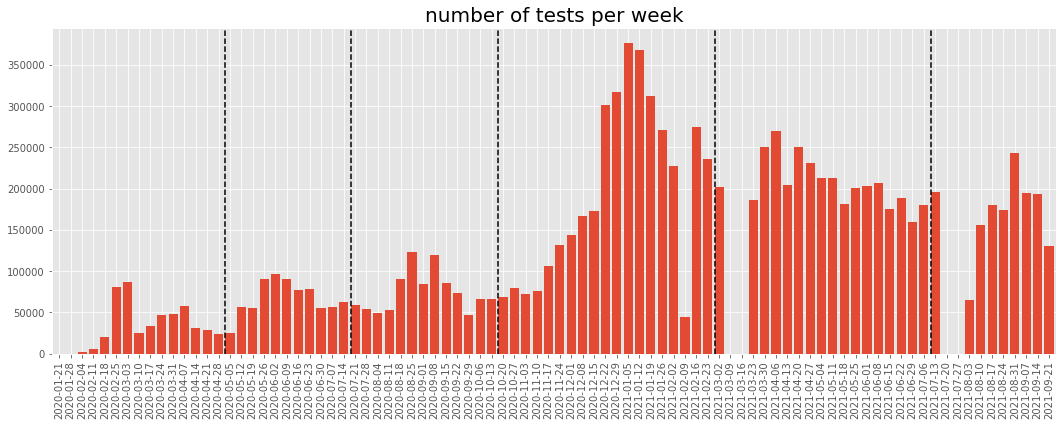

In [6]:
test_week_df = pd.DataFrame({'date' : week_date,
                            'Weekly_test' : weekly_test})

ax = test_week_df.Weekly_test.plot(figsize=(18,6),width=0.8, kind="bar", style = 'b', label = 'Weekly_Test')
ax.set_xticklabels(test_week_df['date'], rotation = 90)
plt.axvline(x=14.6, color='k', linestyle='--')
plt.axvline(x=25.6, color='k', linestyle='--')
plt.axvline(x=38.6, color='k', linestyle='--')
plt.axvline(x=57.6, color='k', linestyle='--')
plt.axvline(x=76.6, color='k', linestyle='--')
plt.title('number of tests per week', fontsize=20)
plt.savefig('Number of Test per Week.png')

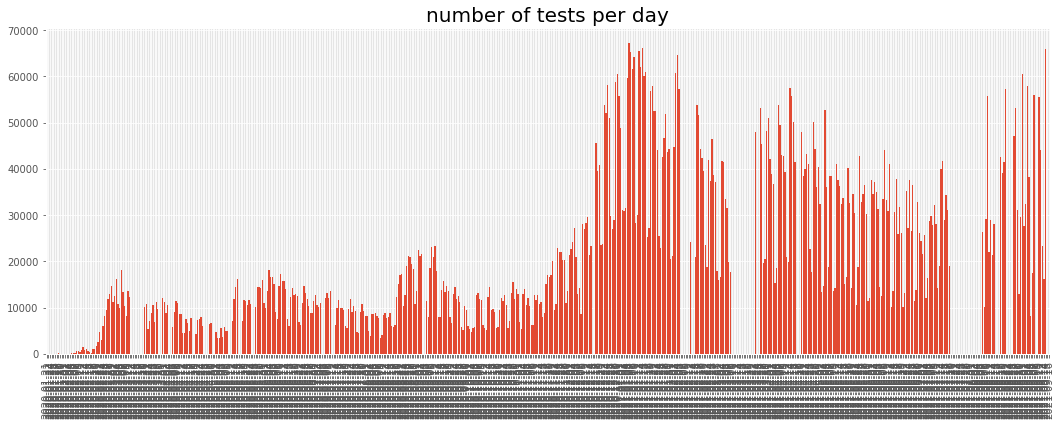

In [7]:
start_date = test_data.loc[116695,'date']
end_date = test_data.loc[117300,'date']
test_data = test_data[(test_data['date']>= start_date) & (test_data['date']< end_date)]

ax = test_data.new_tests.plot(figsize=(18,6),width=0.8, kind="bar", style = 'b', label = 'New_tests')
ax.set_xticklabels(test_data['date'], rotation = 90)
# plt.axvline(x=14.6, color='k', linestyle='--')
# plt.axvline(x=25.6, color='k', linestyle='--')
# plt.axvline(x=38.6, color='k', linestyle='--')
# plt.axvline(x=57.6, color='k', linestyle='--')
# plt.axvline(x=76.6, color='k', linestyle='--')
plt.title('number of tests per day', fontsize=20)
plt.savefig('Number of Test per day.png')

In [8]:
df_test_case

,date,total_질병청,차이,total_owid,월별_질병청,월별_owid
0,2020-03-01,96985,0.0,96985.0,96985,NaN
1,2020-04-01,421547,16585.0,404962.0,324562,307977.0
2,2020-05-01,623069,8685.0,614384.0,201522,209422.0
3,2020-06-01,921391,24058.0,897333.0,298322,282949.0
4,2020-07-01,1285231,19526.0,1265705.0,363840,368372.0
5,2020-08-01,1571830,18278.0,1553552.0,286599,287847.0
6,2020-09-01,1959080,56743.0,1902337.0,387250,348785.0
7,2020-10-01,2328435,20029.0,2308406.0,369355,406069.0
8,2020-11-01,2630630,24838.0,2605792.0,302195,297386.0
9,2020-12-01,3083997,64892.0,3019105.0,453367,413313.0


<ipython-input-10-eae2b0f518cb>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(yticks_.astype(int), fontsize=20)
<ipython-input-10-eae2b0f518cb>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(yticks_, fontsize=20)


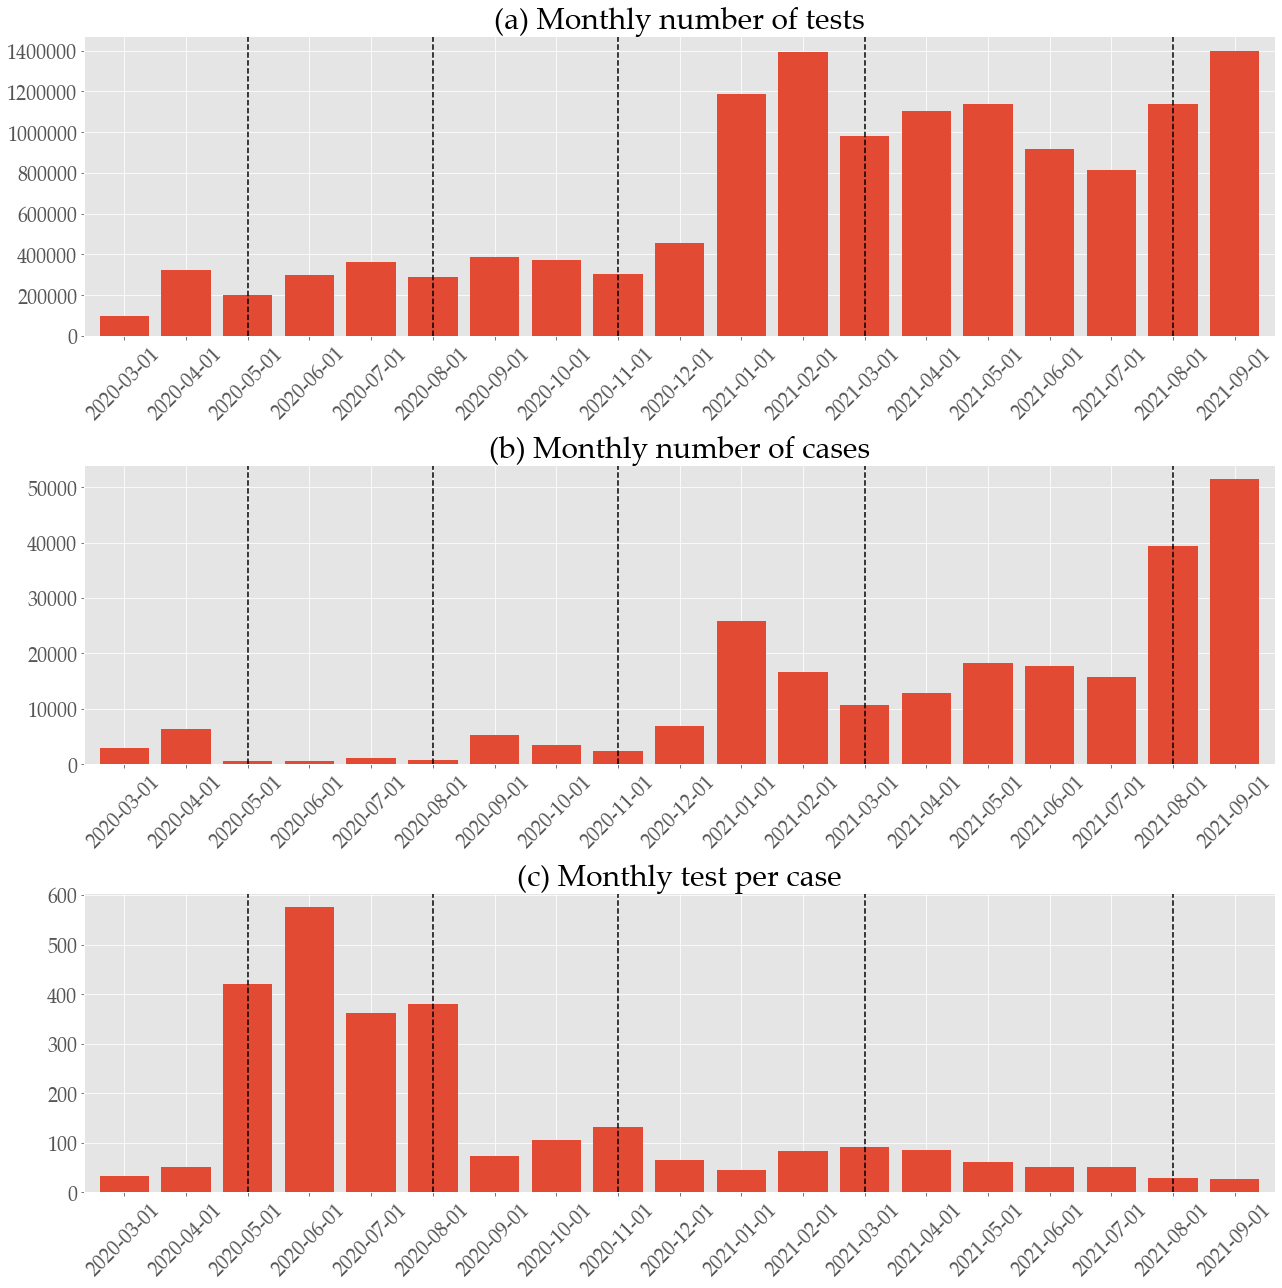

In [10]:
style.use('ggplot')
plt.rcParams["font.family"] = "Palatino Linotype"
fig, ax = plt.subplots(ncols = 1, nrows= 3, figsize=(18,18))
df_test_case = pd.read_csv('Data/월별 (누적) 검사건수 그래프.csv')
df_test_case = df_test_case.loc[:18]
# df_test_case['월별_질병청'] = pd.to_numeric(df_test_case['월별_질병청'])

test_case = list(df_test_case['월별_질병청'])


df_test_case['월별_질병청'].plot(width=0.8, kind="bar", style = 'b', ax=ax[0])#, label = 'New_test
ax[0].set_xticklabels(df_test_case['date'], rotation = 45, fontsize=20)
yticks_ = ax[0].get_yticks(minor=False)
ax[0].set_yticklabels(yticks_.astype(int), fontsize=20)
ax[0].set_title('(a) Monthly number of tests', fontsize=30)
ax[0].axvline(x=2, color='k', linestyle='--')
ax[0].axvline(x=5, color='k', linestyle='--')
ax[0].axvline(x=8, color='k', linestyle='--')
ax[0].axvline(x=12, color='k', linestyle='--')
ax[0].axvline(x=17, color='k', linestyle='--')
# ax[0] = df_test_case['total_질병청'].plot(figsize=(18,6),width=0.8, kind="bar", style = 'b')
# ax[0].set_xticklabels(df_test_case['date'], rotation = 90)

### 비교를 위한 월별 확진자
Net_df = pd.read_csv('Data/Net_df_1223_total_region.csv')
Net_df['inf_time'] = pd.to_datetime(Net_df['inf_time'], format="%Y-%m-%d", errors='ignore')
Net_df['inf_time'] = Net_df['inf_time'].dt.date
Net_df['Primary_id'] = Net_df['Primary_id'].astype(int)

# Net_df = pd.read_csv('Data/정책연구용DB(211209)_대한수학회.csv')
# Net_df['신고일'] = pd.to_datetime(Net_df['신고일'], format="%Y-%m-%d", errors='ignore')
# Net_df['신고일'] = Net_df['신고일'].dt.date

Monthly_case_list = []
start_date = datetime.strptime('2020-01-30',"%Y-%m-%d").date()

month_list = ['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
              '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01']#, '2021-11-01', '2021-12-01']
for i in range(len(month_list)-1): # Net_df2의 길이는 날짜의 길이가 아님. 확진자의 정보임 -> 카운트를 한 후에 길이를 재야함.

    end_date = datetime.strptime(month_list[i+1],"%Y-%m-%d").date()
        
    Monthly_case_tmp = Net_df['inf_time'][(Net_df['inf_time']>= start_date) & (Net_df['inf_time']< end_date)]
    # Monthly_case_tmp = Net_df['신고일'][(Net_df['신고일']>= start_date) & (Net_df['신고일']< end_date)]
    Monthly_case_list.append(len(Monthly_case_tmp))
    
    start_date = end_date

M_df = pd.DataFrame({'Date' : month_list[1:-1],
                      'Rate' : Monthly_case_list[:-1]})
M_df['Rate'].plot(width=0.8, kind="bar", style = 'b', ax=ax[1])#, label = 'New_test
# ax[1].bar(range(0, len(MR_list)), MR_list)
# ax[1].bar(range(0, len(MR_list[:-2])), MR_list[:-2])
# yticks_ = ax[1].get_yticks(minor=False)
# ax[1].set_yticklabels(yticks_.astype(int), fontsize=20)
ax[1].set_xticklabels(M_df['Date'], rotation = 45, fontsize=20)
ax[1].set_title('(b) Monthly number of cases', fontsize=30)
yticks_ = ax[1].get_yticks()
yticks_ = np.array(yticks_, int)
ax[1].set_yticklabels(yticks_, fontsize=20)
ax[1].axvline(x=2, color='k', linestyle='--')
ax[1].axvline(x=5, color='k', linestyle='--')
ax[1].axvline(x=8, color='k', linestyle='--')
ax[1].axvline(x=12, color='k', linestyle='--')
ax[1].axvline(x=17, color='k', linestyle='--')

MR_list = []
for i in df_test_case.index:
    # MR = Monthly_case_list[i] / df_test_case.loc[i, '월별_질병청']
    MR = df_test_case.loc[i, '월별_질병청'] / Monthly_case_list[i]
    MR_list.append(MR)

MR_df = pd.DataFrame({'Date' : month_list[1:-1],
                      'Rate' : MR_list})


MR_df['Rate'].plot(width=0.8, kind="bar", style = 'b', ax=ax[2])#, label = 'New_test
# ax[1].bar(range(0, len(MR_list)), MR_list)
# ax[1].bar(range(0, len(MR_list[:-2])), MR_list[:-2])
# yticks_ = ax[1].get_yticks(minor=False)
# ax[1].set_yticklabels(yticks_.astype(int), fontsize=20)
ax[2].set_xticklabels(MR_df['Date'], rotation = 45, fontsize=20)
ax[2].set_title('(c) Monthly test per case', fontsize=30)
plt.yticks(fontsize=20)

ax[2].axvline(x=2, color='k', linestyle='--')
ax[2].axvline(x=5, color='k', linestyle='--')
ax[2].axvline(x=8, color='k', linestyle='--')
ax[2].axvline(x=12, color='k', linestyle='--')
ax[2].axvline(x=17, color='k', linestyle='--')

fig.tight_layout()
fig.savefig('Monlty number of cases.png')

<ipython-input-5-80788429a3cd>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(yticks_.astype(int), fontsize=20)
<ipython-input-5-80788429a3cd>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(yticks_.astype(int), fontsize=20)
<ipython-input-5-80788429a3cd>:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,0].set_yticklabels(yticks_.astype(int), fontsize=20)
<ipython-input-5-80788429a3cd>:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,1].set_yticklabels(yticks_.astype(int), fontsize=20)


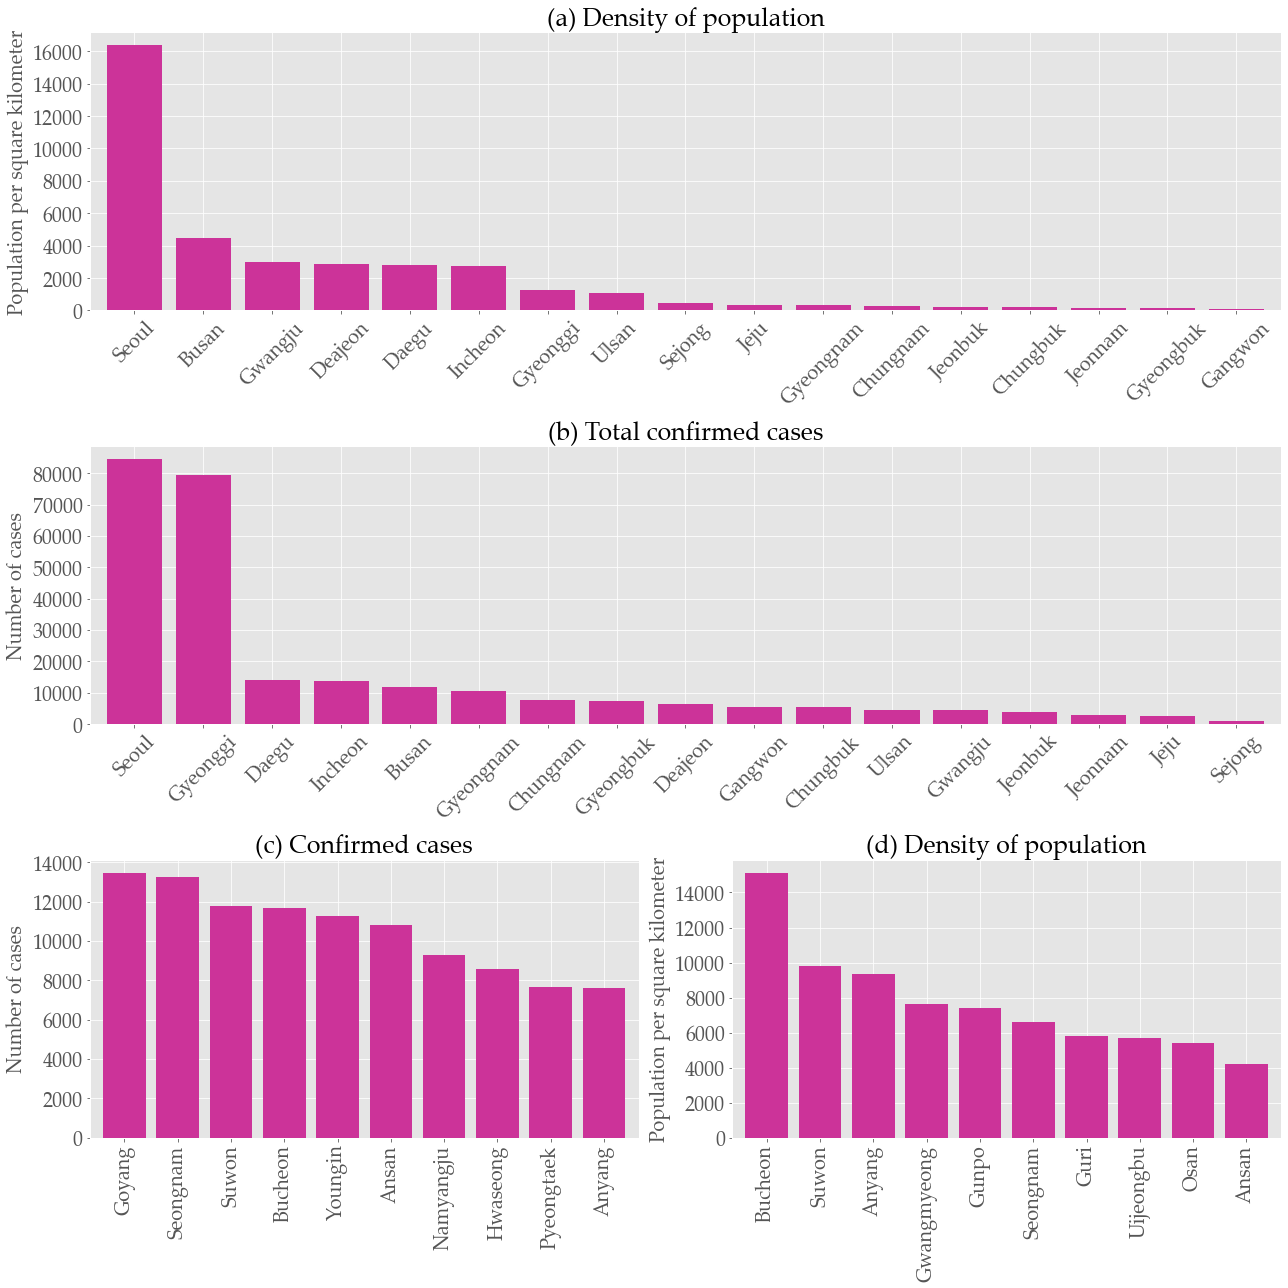

In [5]:
# 시도별 인구밀도
style.use('ggplot')
fig, ax = plt.subplots(3,2,figsize=(18,18))
region = ['Seoul', 'Busan', 'Gwangju', 'Deajeon', 'Daegu', 'Incheon', 'Gyeonggi', 'Ulsan', 'Sejong'
                    , 'Jeju', 'Gyeongnam', 'Chungnam', 'Jeonbuk', 'Chungbuk', 'Jeonnam', 'Gyeongbuk', 'Gangwon']
dense = [16364, 4479.9, 2998.8, 2852.3, 2791, 2755.5, 1226.4, 1099.6, 439, 327.5, 316.4, 256.6, 227.4, 214.6, 146.1, 140.8, 90.2]

region_df = pd.DataFrame({'region' : region,'dense' : dense})
region_df = region_df.sort_values(by=['dense'], ascending=False)

ax0 = plt.subplot(3,1,1)
ax0 = region_df.loc[:,'dense'].plot(ax=ax0,width=0.8, kind="bar", color='#CC3399')#, label = 'New_test
# ax0.bar(range(17),dense, width=0.8, color='#CC3399')
ax0.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
ax0.set_xticklabels(region_df.loc[:,'region'], rotation=45, fontsize=20)
yticks_ = ax0.get_yticks(minor=False)
ax0.set_yticklabels(yticks_.astype(int), fontsize=20)

ax0.set_title('(a) Density of population', fontsize=25)
ax0.set_ylabel('Population per square kilometer', fontsize=20)


Net_df_2 = Net_df.copy()
Region_c = []

Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '01서울']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '02부산']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '05광주']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '06대전']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '03대구']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '04인천']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '09경기']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '07울산']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '08세종']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '17제주']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '16경남']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '12충남']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '13전북']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '11충북']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '14전남']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '15경북']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '10강원']))

region = ['Seoul', 'Busan', 'Gwangju', 'Deajeon', 'Daegu', 'Incheon', 'Gyeonggi', 'Ulsan', 'Sejong'
                    , 'Jeju', 'Gyeongnam', 'Chungnam', 'Jeonbuk', 'Chungbuk', 'Jeonnam', 'Gyeongbuk', 'Gangwon']
Region_co = pd.DataFrame({'Region' : region,
                          'CC' : Region_c})
ax1 = plt.subplot(3,1,2)
Region_co = Region_co.sort_values(by = ['CC'], ascending=False)
ax1 = Region_co.loc[:,'CC'].plot(ax=ax1, width=0.8, kind="bar", color = '#CC3399')
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
ax1.set_xticklabels(Region_co.loc[:,'Region'], rotation=45, fontsize=20)
yticks_ = ax1.get_yticks(minor=False)
ax1.set_yticklabels(yticks_.astype(int), fontsize=20)
ax1.set_title('(b) Total confirmed cases', fontsize=25)
ax1.set_ylabel('Number of cases', fontsize=20)



df_region_case = pd.read_csv('Data/시군별 확진자.csv', encoding='utf-8')
df_region_case = df_region_case.sort_values(by=['확진자수'], ascending=False)

ax[2,0] = df_region_case.loc[:8,'확진자수'].plot(ax=ax[2,0],width=0.8, kind="bar", color = '#CC3399')#, label = 'New_test
ax[2,0].set_xticks([0,1,2,3,4,5,6,7,8,9])
ax[2,0].set_xticklabels(df_region_case.loc[:8,'시군별'], rotation = 90, fontsize=20)
yticks_ = ax[2,0].get_yticks(minor=False)
ax[2,0].set_yticklabels(yticks_.astype(int), fontsize=20)
ax[2,0].set_title('(c) Confirmed cases', fontsize=25)
ax[2,0].set_ylabel('Number of cases', fontsize=20)

df_region_density = pd.read_csv('Data/경기도 시군별 인구밀도.csv', encoding='utf-8')
df_region_density = df_region_density.sort_values(by=['인구밀도'], ascending=False)

ax[2,1] = df_region_density.loc[:8,'인구밀도'].plot(ax=ax[2,1],width=0.8, kind="bar", color='#CC3399')#, label = 'New_test
ax[2,1].set_xticks([0,1,2,3,4,5,6,7,8,9])
ax[2,1].set_xticklabels(df_region_density.loc[:8,'시군별'], rotation = 90, fontsize = 20)
yticks_ = ax[2,1].get_yticks(minor=False)
ax[2,1].set_yticklabels(yticks_.astype(int), fontsize=20)
ax[2,1].set_title('(d) Density of population', fontsize=25)
ax[2,1].set_ylabel('Population per square kilometer', fontsize=20)
fig.tight_layout()
fig.savefig('region_density_and_confirmed_case.png')

<AxesSubplot:>

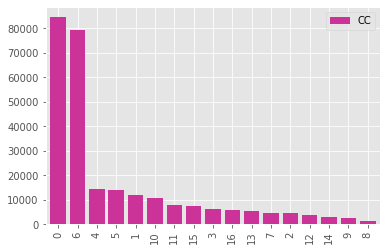

In [38]:
Net_df_2 = Net_df.copy()
Region_c = []

Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '01서울']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '02부산']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '05광주']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '06대전']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '03대구']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '04인천']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '09경기']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '07울산']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '08세종']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '17제주']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '16경남']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '12충남']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '13전북']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '11충북']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '14전남']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '15경북']))
Region_c.append(len(Net_df_2[Net_df_2['region_type'] == '10강원']))

region = ['Seoul', 'Busan', 'Gwangju', 'Deajeon', 'Daegu', 'Incheon', 'Gyeonggi', 'Ulsan', 'Sejong'
                    , 'Jeju', 'Gyeongnam', 'Chungnam', 'Jeonbuk', 'Chungbuk', 'Jeonnam', 'Gyeongbuk', 'Gangwon']
Region_co = pd.DataFrame({'Region' : region,
                          'CC' : Region_c})

Region_co = Region_co.sort_values(by = ['CC'], ascending=False)
Region_co.plot(width=0.8, kind="bar", color = '#CC3399')

# df_region_case.loc[:8,'확진자수'].plot(ax=ax[1,0],width=0.8, kind="bar", color = '#CC3399')#, label = 'New_test


In [6]:
df_region_case = df_region_case.sort_values(by=['확진자수'], ascending=False)

ax[1,0] = df_region_case.loc[:8,'확진자수'].plot(ax=ax[1,0],width=0.8, kind="bar", color = '#CC3399')#, label = 'New_test
ax[1,0].set_xticks([0,1,2,3,4,5,6,7,8,9])
ax[1,0].set_xticklabels(df_region_case.loc[:8,'시군별'], rotation = 45, fontsize=15)
yticks_ = ax[1,0].get_yticks(minor=False)
ax[1,0].set_yticklabels(yticks_.astype(int), fontsize=15)
ax[1,0].set_title('Confirmed cases', fontsize=15)
ax[1,0].set_ylabel('Number of cases', fontsize=15)

NameError: name 'df_region_case' is not defined

In [5]:
style.use('ggplot')
mutant_df = pd.read_csv('Data/Mutant.csv')
Net_df = pd.read_csv('Data/Net_df_1223_total_region.csv')
mutant_df['Date'] = pd.to_datetime(mutant_df['Date'], format="%Y-%m-%d", errors='ignore')
mutant_df['Date'] = mutant_df['Date'].dt.date
mutant_df = mutant_df.loc[2:]

In [6]:
WS[90:]

,Date,WS,Unnamed: 2,Unnamed: 3,Unnamed: 4
90,2021-10-21,11567.0,"334,058","14,911","348,969"
91,2021-10-28,30122.0,"345,466","15,070","360,536"
92,2021-11-04,15399.0,"375,464","15,194","390,658"
93,2021-11-11,18514.0,"390,719","15,338","406,057"
94,2021-11-18,23944.0,"409,099","15,472","424,571"
95,2021-11-25,29857.0,"432,901","15,614","448,515"
96,2021-12-02,41250.0,"462,555","15,817","478,372"
97,2021-12-09,48165.0,"503,606","16,016","519,622"
98,2021-12-16,45092.0,"551,551","16,236","567,787"
99,2021-12-23,35299.0,"596,209","16,670","612,879"


<ipython-input-47-152a8627aa5b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks_2, fontsize=20)


[Text(0, 0.0, '0'),
 Text(0, 5000.0, '5,000'),
 Text(0, 10000.0, '10,000'),
 Text(0, 15000.0, '15,000'),
 Text(0, 20000.0, '20,000'),
 Text(0, 25000.0, '25,000'),
 Text(0, 30000.0, '38,000'),
 Text(0, 35000.0, '140,000'),
 Text(0, 40000.0, '1,000,000'),
 Text(0, 45000.0, '1,030,000')]

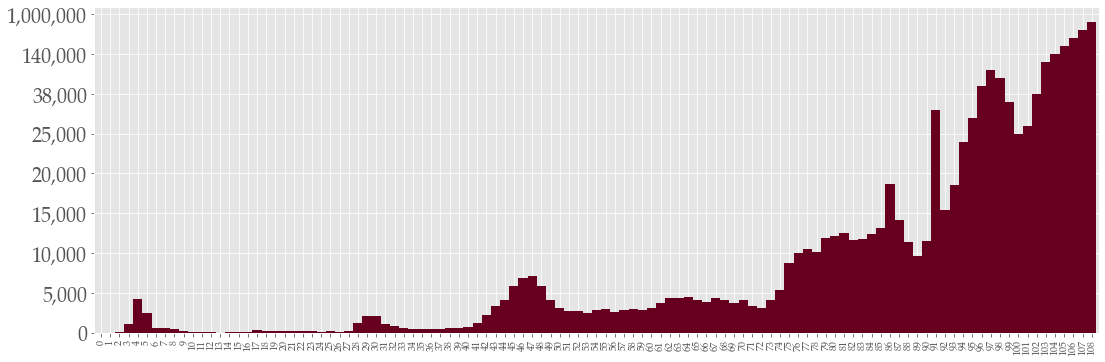

In [47]:

WS = pd.read_csv('Data/WS_re.csv')
fig, ax = plt.subplots()
WS.WS_re.plot(figsize=(18,6), width=1, kind="bar", style = 'b', label = 'Weekly Case', ax=ax, colormap='RdGy')
yticks_ = ax.get_yticks(minor=False)
yticks_[6] = 38000
yticks_[7] = 140000
yticks_[8] = 1000000
yticks_[9] = 1030000

yticks_2 = []
for i2 in range(len(yticks_)):
    yticks_2.append(str(format(yticks_.astype(int)[i2], ',')))
ax.set_yticklabels(yticks_2, fontsize=20)

In [46]:
yticks_[6] = 38000
yticks_[7] = 140000
yticks_[8] = 1000000
yticks_[9] = 1030000


<ipython-input-9-2150b7678bc6>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(yticks_2, fontsize=20)


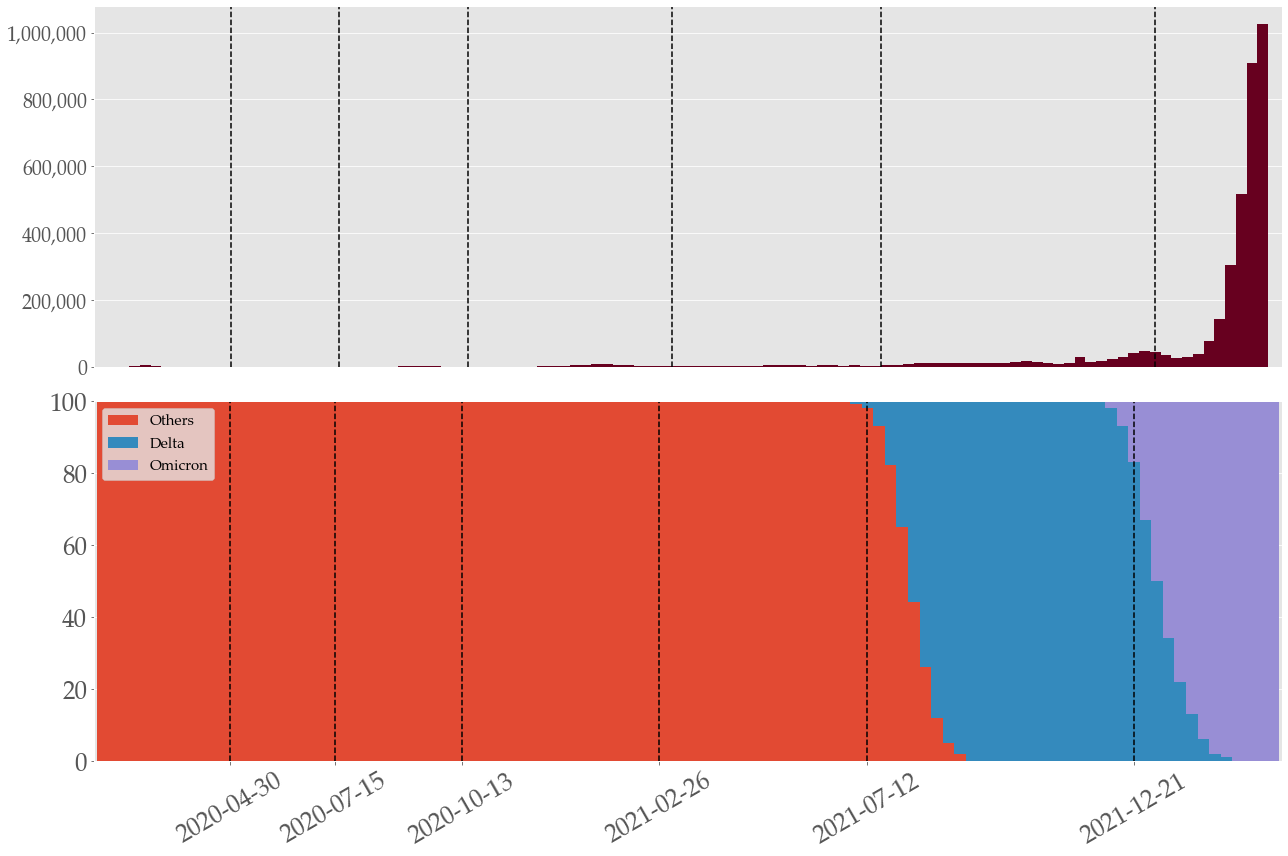

In [9]:
fig, ax = plt.subplots(2,1)


WS = pd.read_csv('Data/WS.csv')
WS = WS.loc[0:109]
WS.WS.plot(figsize=(18,6), width=1, kind="bar", style = 'b', label = 'Weekly Case', ax=ax[0], colormap='RdGy')


ax[0].set_xticklabels(WS['Date'])
# ax[0].xaxis.set_ticks([11,20,31,48,66,89])
ax[0].axvline(x=12, color='k', linestyle='--')
ax[0].axvline(x=22, color='k', linestyle='--')
ax[0].axvline(x=34, color='k', linestyle='--')
ax[0].axvline(x=53, color='k', linestyle='--')
ax[0].axvline(x=72.5, color='k', linestyle='--')
ax[0].axvline(x=98, color='k', linestyle='--')
xticks_ = ax[0].get_xticks(minor=False)
yticks_ = ax[0].get_yticks(minor=False)
yticks_2 = []
for i2 in range(len(yticks_)):
    yticks_2.append(str(format(yticks_.astype(int)[i2], ',')))

ax[0].set_yticklabels(yticks_2, fontsize=20)
ax[0].axes.xaxis.set_visible(False)
# ax[0].set_xticklabels(xticks_, fontsize=20)
# ax[0].set_visible(False)

style.use('ggplot')
mutant_df = pd.read_csv('Data/Mutant_sup.csv')

mutant_df[['Others', 'Delta', 'Omicron']].plot.bar(figsize=(18,12), stacked=True, ax=ax[1], width=1)
ax[1].set_xticklabels(mutant_df['Date'])
ax[1].xaxis.set_ticks([11,20,31,48,66,89])
ax[1].axvline(x=11, color='k', linestyle='--')
ax[1].axvline(x=20, color='k', linestyle='--')
ax[1].axvline(x=31, color='k', linestyle='--')
ax[1].axvline(x=48, color='k', linestyle='--')
ax[1].axvline(x=66, color='k', linestyle='--')
ax[1].axvline(x=89, color='k', linestyle='--')
ax[1].set_xticklabels([datetime(2020, 4, 30).date(),
                     datetime(2020, 7, 15).date(),
                     datetime(2020, 10, 13).date(),
                     datetime(2021, 2, 26).date(),
                     datetime(2021, 7, 12).date(),
                     datetime(2021, 12, 21).date()], fontsize=25, minor=False, rotation=30)

plt.legend(fontsize=15, loc='upper left')
plt.yticks(fontsize=25)
plt.ylim([0, 100])
plt.tight_layout()
plt.savefig('Mutant_sub.png')

In [ ]:
mutant_df

<ipython-input-22-544b4642903b>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(yticks_2, fontsize=25)
<ipython-input-22-544b4642903b>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(yticks_2, fontsize=20)


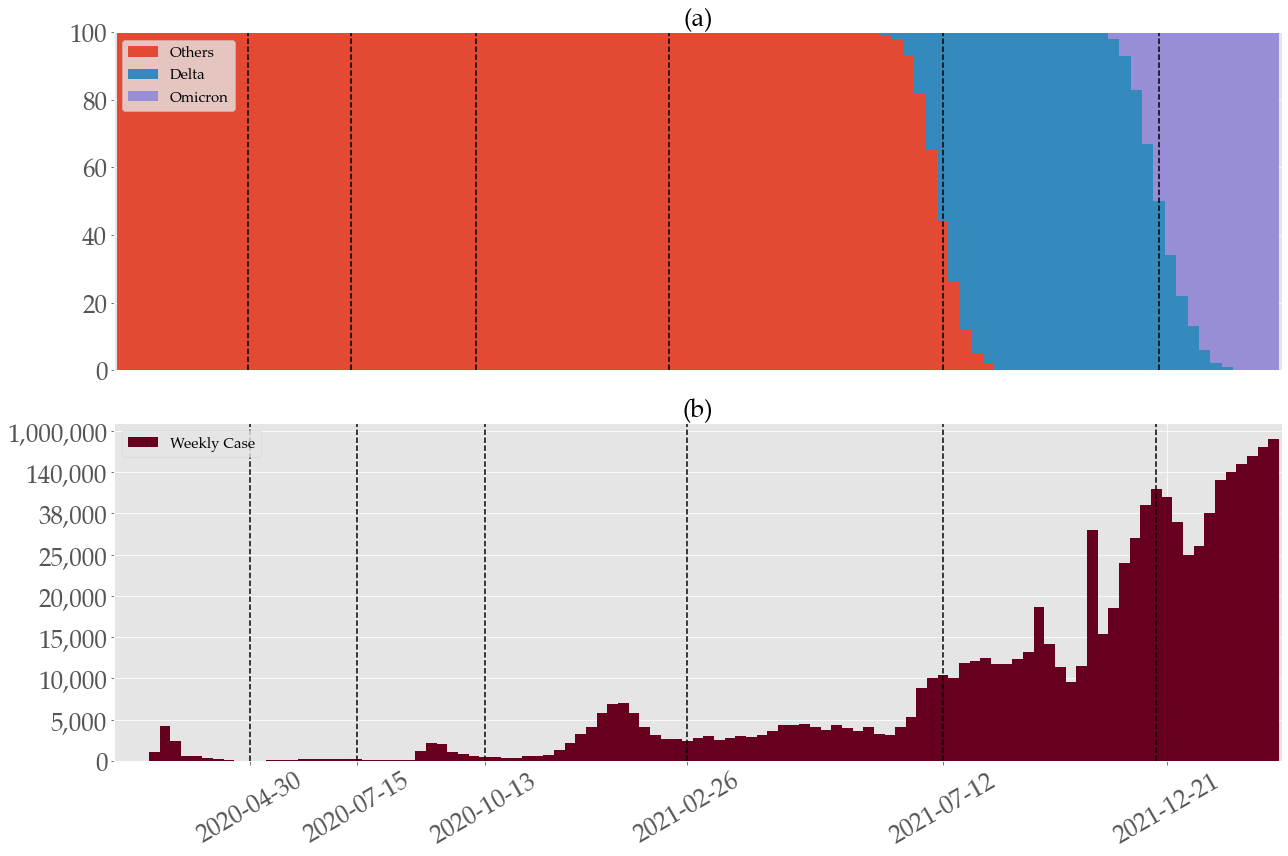

In [22]:
fig, ax = plt.subplots(2,1)


WS = pd.read_csv('Data/WS.csv')

style.use('ggplot')
mutant_df = pd.read_csv('Data/Mutant_sup.csv')

mutant_df[['Others', 'Delta', 'Omicron']].plot.bar(figsize=(18,12),
                                                   stacked=True, ax=ax[0], width=1),
                                                #    color={"Delta": "#F8766D",
                                                #         "Omicron": "#7CAE00",
                                                #         "Others" : "#00BFC4"})

ax[0].set_xticklabels(mutant_df['Date'])
# ax[0].xaxis.set_ticks([11,20,31,48,66,89])
ax[0].axvline(x=11, color='k', linestyle='--')
ax[0].axvline(x=20, color='k', linestyle='--')
ax[0].axvline(x=31, color='k', linestyle='--')
ax[0].axvline(x=48, color='k', linestyle='--')
ax[0].axvline(x=72, color='k', linestyle='--')
ax[0].axvline(x=91, color='k', linestyle='--')
ax[0].set_ylim([0, 100])
ax[0].set_title('(a)', fontsize=25)


xticks_ = ax[0].get_xticks(minor=False)
yticks_ = ax[0].get_yticks(minor=False)
yticks_2 = []
for i2 in range(len(yticks_)):
    yticks_2.append(str(format(yticks_.astype(int)[i2], ',')))

ax[0].set_yticklabels(yticks_2, fontsize=25)
ax[0].axes.xaxis.set_visible(False)
ax[0].legend(fontsize=15, loc='upper left')
# ax[0].set_xticklabels(xticks_, fontsize=20)
# ax[0].set_visible(False)



WS = pd.read_csv('Data/WS_re.csv')
WS.WS_re.plot(width=1, kind="bar", style = 'b', label = 'Weekly Case', ax=ax[1], colormap='RdGy')
yticks_ = ax[1].get_yticks(minor=False)
yticks_[6] = 38000
yticks_[7] = 140000
yticks_[8] = 1000000
yticks_[9] = 1030000

yticks_2 = []
for i2 in range(len(yticks_)):
    yticks_2.append(str(format(yticks_.astype(int)[i2], ',')))
ax[1].set_yticklabels(yticks_2, fontsize=20)

ax[1].set_xticklabels(WS['Date'])
ax[1].xaxis.set_ticks([12,22,34,53,77,98])
ax[1].axvline(x=12, color='k', linestyle='--')
ax[1].axvline(x=22, color='k', linestyle='--')
ax[1].axvline(x=34, color='k', linestyle='--')
ax[1].axvline(x=53, color='k', linestyle='--')
ax[1].axvline(x=77, color='k', linestyle='--')
ax[1].axvline(x=97, color='k', linestyle='--')
ax[1].set_title('(b)', fontsize = 25)
ax[1].set_xticklabels([datetime(2020, 4, 30).date(),
                     datetime(2020, 7, 15).date(),
                     datetime(2020, 10, 13).date(),
                     datetime(2021, 2, 26).date(),
                     datetime(2021, 7, 12).date(),
                     datetime(2021, 12, 21).date()], fontsize=25, minor=False, rotation=30)

plt.legend(fontsize=15, loc='upper left')
plt.yticks(fontsize=25)
plt.tight_layout()
plt.savefig('Mutant_sub.png')

<ipython-input-56-b7c5211afa47>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(yticks_2, fontsize=25)
<ipython-input-56-b7c5211afa47>:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(yticks_2, fontsize=20)


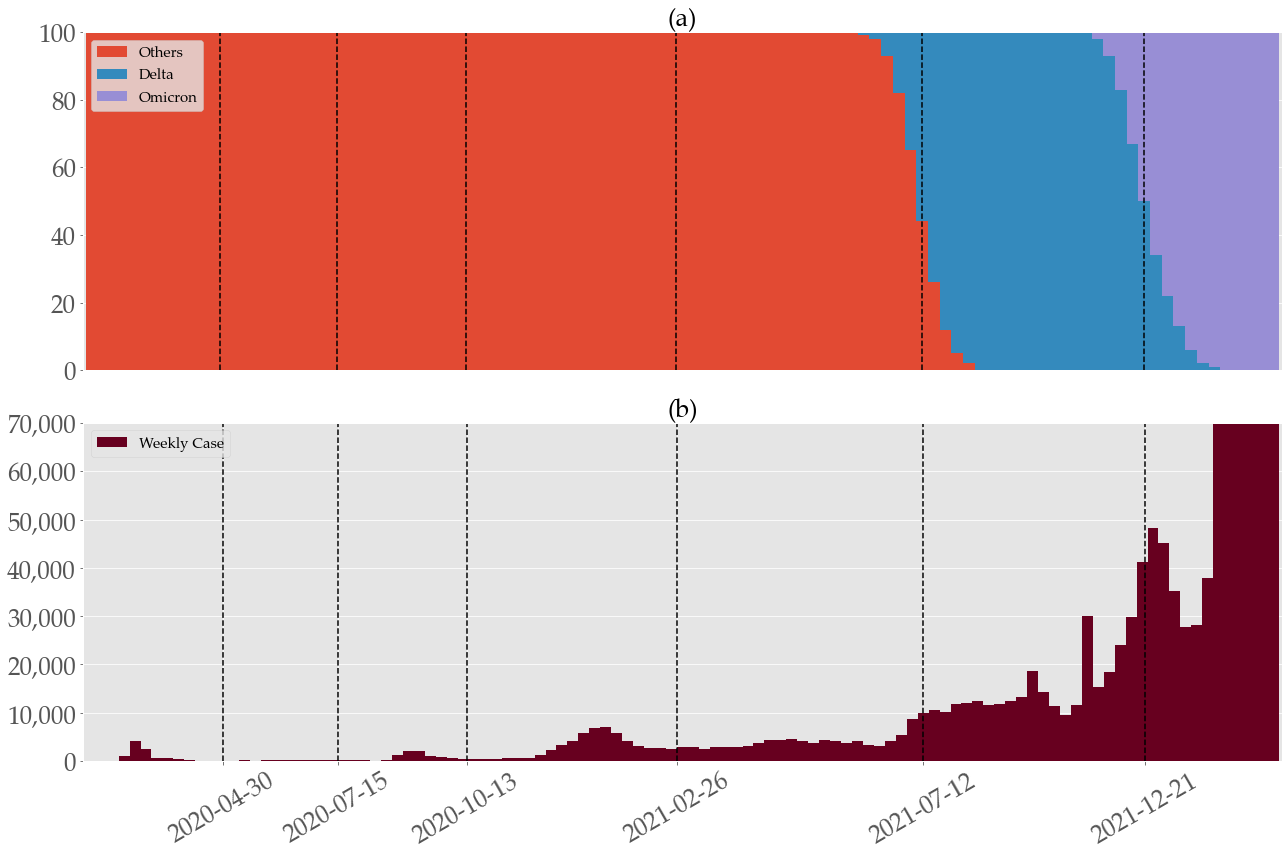

In [56]:
fig, ax = plt.subplots(2,1)


WS = pd.read_csv('Data/WS.csv')

style.use('ggplot')
mutant_df = pd.read_csv('Data/Mutant_sup.csv')

mutant_df[['Others', 'Delta', 'Omicron']].plot.bar(figsize=(18,12),
                                                   stacked=True, ax=ax[0], width=1),
                                                #    color={"Delta": "#F8766D",
                                                #         "Omicron": "#7CAE00",
                                                #         "Others" : "#00BFC4"})

ax[0].set_xticklabels(mutant_df['Date'])
# ax[0].xaxis.set_ticks([11,20,31,48,66,89])
ax[0].axvline(x=11, color='k', linestyle='--')
ax[0].axvline(x=21, color='k', linestyle='--')
ax[0].axvline(x=32, color='k', linestyle='--')
ax[0].axvline(x=50, color='k', linestyle='--')
ax[0].axvline(x=71, color='k', linestyle='--')
ax[0].axvline(x=90, color='k', linestyle='--')
ax[0].set_ylim([0, 100])
ax[0].set_title('(a)', fontsize=25)


xticks_ = ax[0].get_xticks(minor=False)
yticks_ = ax[0].get_yticks(minor=False)
yticks_2 = []
for i2 in range(len(yticks_)):
    yticks_2.append(str(format(yticks_.astype(int)[i2], ',')))

ax[0].set_yticklabels(yticks_2, fontsize=25)
ax[0].axes.xaxis.set_visible(False)
ax[0].legend(fontsize=15, loc='upper left')
# ax[0].set_xticklabels(xticks_, fontsize=20)
# ax[0].set_visible(False)



WS = pd.read_csv('Data/WS.csv')
WS = WS.loc[:108]
WS.WS.plot(width=1, kind="bar", style = 'b', label = 'Weekly Case', ax=ax[1], colormap='RdGy')

# yticks_[6] = 38000
# yticks_[7] = 140000
# yticks_[8] = 1000000
# yticks_[9] = 1030000



ax[1].set_xticklabels(WS['Date'])
ax[1].xaxis.set_ticks([12,22.5,34.3,53.5,76,96.3])
ax[1].axvline(x=12, color='k', linestyle='--')
ax[1].axvline(x=22.5, color='k', linestyle='--')
ax[1].axvline(x=34.3, color='k', linestyle='--')
ax[1].axvline(x=53.5, color='k', linestyle='--')
ax[1].axvline(x=76, color='k', linestyle='--')
ax[1].axvline(x=96.3, color='k', linestyle='--')
ax[1].set_title('(b)', fontsize = 25)
ax[1].set_xticklabels([datetime(2020, 4, 30).date(),
                     datetime(2020, 7, 15).date(),
                     datetime(2020, 10, 13).date(),
                     datetime(2021, 2, 26).date(),
                     datetime(2021, 7, 12).date(),
                     datetime(2021, 12, 21).date()], fontsize=25, minor=False, rotation=30)
ax[1].set_ylim([0, 70000])
yticks_ = ax[1].get_yticks(minor=False)
yticks_2 = []
for i2 in range(len(yticks_)):
    yticks_2.append(str(format(yticks_.astype(int)[i2], ',')))
ax[1].set_yticklabels(yticks_2, fontsize=20)

plt.legend(fontsize=15, loc='upper left')
plt.yticks(fontsize=25)
plt.tight_layout()
plt.savefig('Mutant_sub_5.png')

In [2]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
from sklearn.linear_model import LinearRegression, RANSACRegressor
from scipy import stats
import scipy.stats
from matplotlib import style
from datetime import timedelta

import os
import matplotlib as mpl
%matplotlib inline
from scipy.stats import gamma, poisson
from datetime import timedelta

plt.rcParams["font.family"] = "Palatino Linotype"
Net_df = pd.read_csv('Data/Net_df_1223_total_region.csv')

Net_df['inf_time'] = pd.to_datetime(Net_df['inf_time'], format="%Y-%m-%d", errors='ignore')
Net_df['inf_time'] = Net_df['inf_time'].dt.date
Net_df['Primary_id'] = Net_df['Primary_id'].astype(int)

In [ ]:
fig = plt.figure(figsize=(18,15))#,constrained_layout=True)
ax1 = plt.subplot(311)
# style.use('default')
style.use('ggplot')
# plt.style.use('seaborn-white')
plt.rcParams["font.family"] = "Palatino Linotype"
# plt.rc('font', family="Palatino Linotype")

target_date = ['2020-01-19', '2021-09-16']
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()

for i in range(len(target_date) - 1):
    Net_df_1 = Net_df[(Net_df['inf_time'] >= target_date[i]) & (Net_df['inf_time'] < target_date[i + 1])]
    del Net_df_1['Unnamed: 0']

Net_df_3 = Net_df_1.copy()

Net_df_3['Count'] = 1
Net_df_3['Un_Count'] = 1
Net_df_3['Asym_Count'] = 1
Net_df_3['Un_Count'][Net_df_3['Primary_id'] != 0] = 0 #Primary_id가 0이 아닌거(Linked case)를 0으로 바꿔줌 -> Unknown이 1이 됨
Net_df_3['Asym_Count'][Net_df_3['Onset_date'] != '0'] = 0 #Onset_date가 0이 아닌거를 0으로 바꿔줌 -> Onset_date가 없는게 1이 됨

total_days = (list(Counter(Net_df_3['inf_time']))[-1] - list(Counter(Net_df_3['inf_time']))[0]).days
start_date = datetime.strptime('2020-01-30',"%Y-%m-%d").date()
week_date = []
Weekly_case = []
Asym_rate = []
Unknown_Primary_rate = []
Male_rate_U = []
Female_rate_U = []
Male_rate_L = []
Female_rate_L = []
gender_count_L = {}
gender_count_U = {}
    
plt.rcParams["font.family"] = "Palatino Linotype"
for i in range(int(np.floor(total_days/7)+1)): # Net_df_3의 길이는 날짜의 길이가 아님. 확진자의 정보임 -> 카운트를 한 후에 길이를 재야함.
    
    end_date = start_date + timedelta(days=7)
    
    R1_df3 = Net_df_3[['Count','Un_Count','Asym_Count']][(Net_df_3['inf_time']>= start_date) & (Net_df_3['inf_time']< end_date)]
    R_week_sum = R1_df3.sum()
    
    R1_df4 = Net_df_3[['Count', 'Un_Count', 'gender']][(Net_df_3['inf_time']>= start_date) & (Net_df_3['inf_time']< end_date)]
    R_gender_sum_L = R1_df4['gender'][R1_df4['Un_Count'] == 0].sum()
    R_gender_sum_U = R1_df4['gender'][R1_df4['Un_Count'] == 1].sum()
    # print(R_gender_sum_L)
    
    week_date.append(start_date)
    Weekly_case.append(R_week_sum[0])
    Unknown_Primary_rate.append((R_week_sum[1]/R_week_sum[0]))
    Asym_rate.append((R_week_sum[2]/R_week_sum[0]))
    
    start_date = end_date



plt.rcParams["font.family"] = "Palatino Linotype"    
# plt.figure(1)
R_week_df = pd.DataFrame({'date' : week_date,
                            'Weekly_case' : Weekly_case,
                            'Unknown_Primary_rate' : Unknown_Primary_rate,
                            'Asym_rate' : Asym_rate})

R_week_df.Weekly_case.plot(width=0.8, ax=ax1, kind="bar", color = '#0072B5FF', label = 'Weekly Case')
R_week_df.Unknown_Primary_rate.plot(secondary_y=True, color = '#BC3C29FF', linewidth = 3, ax=ax1, label='Unlinked case')
R_week_df.Asym_rate.plot(secondary_y=True, color = '#E18727FF', linewidth = 3,  ax=ax1, label = 'Asymptomatic case')
yticks_ = ax1.get_yticks(minor=False)
plt.legend(['Unlinked case', 'Asymptomatic case'], loc = 'lower right', fontsize=20)
ax1.set_yticklabels(yticks_.astype(int), fontsize=25)
plt.yticks(fontsize=25)
# ax[0].set_yticks(fontsize=15)/
ax1.set_title('(a)',fontsize=25)
# ax[0].legend(['Unlinked case', 'Asymptomatic case','c] ,fontsize=12)/
ax1.legend(loc = 'upper left',fontsize=20, bbox_to_anchor=(-0.05, 1.2))
ax1.axvline(x=13, color='k', linestyle='--')
ax1.axvline(x=24, color='k', linestyle='--')
ax1.axvline(x=37, color='k', linestyle='--')
ax1.axvline(x=56, color='k', linestyle='--')
ax1.axvline(x=76, color='k', linestyle='--')

plt.rcParams["font.family"] = "Palatino Linotype"
# xticks_ = ax1.get_xticks(minor=False)
# ax1.set_xticks(xticks_)
ax1.xaxis.set_ticks([13,24,37,56,76])  
ax1.set_xticklabels([datetime(2020, 4, 30).date(),datetime(2020, 7, 16).date(),datetime(2020, 10, 15).date(),datetime(2021, 2, 25).date(),datetime(2021, 7, 15).date()], fontsize=25, minor=False)

Enarrow = { 'facecolor' : 'r', 
              'edgecolor':'b', 
              'shrink' : 1, 
              'alpha':0.5
              }

Rearrow = { 'facecolor' : 'g', 
              'edgecolor':'b', 
              'shrink' : 1, 
              'alpha':0.5
              }
fontsize_ = 25
arr_date_E = [7,28,30,42,44,47,76]
arr_date_R = [14,32,36,40,54]

for i2 in range(len(arr_date_E)):
    ax1.annotate('E' + str(i2+1), ha = 'center', va = 'bottom', fontsize=fontsize_,
    xytext = (arr_date_E[i2], R_week_df['Weekly_case'].loc[arr_date_E[i2]]+800),
    xy = (arr_date_E[i2], R_week_df['Weekly_case'].loc[arr_date_E[i2]]+300),
    arrowprops = Enarrow)

for i2 in range(len(arr_date_R)):
    ax1.annotate('R' + str(i2+1), ha = 'center', va = 'bottom', fontsize=fontsize_,
    xytext = (arr_date_R[i2], R_week_df['Weekly_case'].loc[arr_date_R[i2]]+800),
    xy = (arr_date_R[i2], R_week_df['Weekly_case'].loc[arr_date_R[i2]]+300),
    arrowprops = Rearrow)

# Calcuate P value and Correlation
rp_df = pd.DataFrame({})
division_line = [0,13,24,37,56,76,len(R_week_df)]
# division_line = [0,13,25,38,57,76,len(R_week_df)]
for i2 in range(len(division_line)-1):
    a = list(R_week_df['Unknown_Primary_rate'][division_line[i2]:division_line[i2+1]])
    b = list(R_week_df['Asym_rate'][division_line[i2]:division_line[i2+1]])
    c = list(R_week_df['Weekly_case'][division_line[i2]:division_line[i2+1]])
    # print(c)
    r1, p1 = scipy.stats.spearmanr(a,c)
    r2, p2 = scipy.stats.spearmanr(b,c)
    print(str(i2+1) + ' Period')
    print('Corr : {0:.4f}, P-val : {1:.4f}'.format(r1,p1))
    print('Corr : {0:.4f}, P-val : {1:.4f}'.format(r2,p2))
    print(' ')